In [1]:
# Mostly a dummy test idea

# Functionalize network making algorithm
# Import Packages
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D


In [2]:
# Functions that make network.
def makeProbMatrix(prob_list):
    A = prob_list[0]
    B = prob_list[1]
    C = prob_list[2]
    D = prob_list[3]
    return [[A, B, C, D],[B, A, D, C],[C, D, A, B],[D, C, B, A]]

def initializeNetwork(node_numbers, node_type):
    g = ig.Graph(directed = False)
    for k in range(len(node_numbers)):
        g.add_vertices(n = node_numbers[k])
        if k == 0:
            for m in range(0, node_numbers[k]):
                g.vs[m]['type'] = node_type[k]
                #g.vs[m]['attr1'] = node_attribute1[k]
                #g.vs[m]['attr2']  = node_attribute2[k]
        else:
            for m in range(sum(node_numbers[:k]), sum(node_numbers[:k+1])):
                g.vs[m]['type'] = node_type[k]
                #g.vs[m]['attr1'] = node_attribute1[k]
                #g.vs[m]['attr2'] = node_attribute2[k]
    return g

def addConnections(network, prob_matrix):
    for node in range(len(network.vs)):
        for other_node in range(node+1,total_Nodes):
            if (np.random.uniform()) < prob_matrix[network.vs[node]['type']][network.vs[other_node]['type']]:
                network.add_edge(node,other_node)
    return network

def MakeNetwork(node_numbers, node_type, prob_matrix):
    network = initializeNetwork(node_numbers, node_type)
    network = addConnections(network, prob_matrix)
    return network

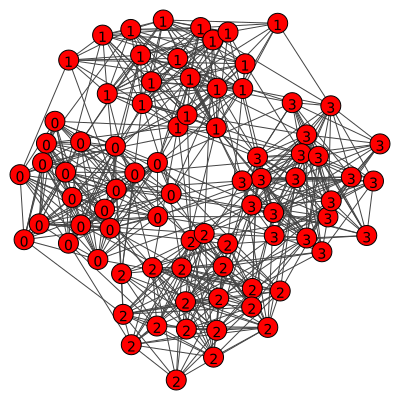

In [9]:
# Define n and P
# Each node is given a type which is based on the combination of attrbutes

node_numbers    = [20, 20, 20, 20] # Slows down a bit when total nodes > 400
total_Nodes     = sum(node_numbers)
node_type       = [0, 1,2,3]
node_attribute1 = [1, 1, 2, 2]
node_attribute2 = [1, 2, 1, 2]

prob_matrix =  makeProbMatrix([0.6, 0.07, 0.05, 0.02])

# Uncomment to check

#network = initializeNetwork(node_numbers, node_type)
#network = addConnections(network, prob_matrix)
network = MakeNetwork (node_numbers, node_type, prob_matrix)
ig.plot(network , bbox=(0,0,400,400), vertex_label=network.vs['type'])


In [10]:
# Lets check how much variation in networks we get from the same p matrix
N = 100
measure1 = [0]*N
measure2 = [0]*N
measure3 = [0]*N
measure4 = [0]*N
measure5 = [0]*N
measure6 = [0]*N

for k in range(N):
    graph       = MakeNetwork (node_numbers, node_type, prob_matrix)
    measure1[k] = graph.assortativity('type')
    graph       = MakeNetwork (node_numbers, node_type, prob_matrix)
    measure2[k] = graph.assortativity('type')
    graph       = MakeNetwork (node_numbers, node_type, prob_matrix)
    measure3[k] = graph.assortativity('type')
    graph       = MakeNetwork (node_numbers, node_type, prob_matrix)
    measure4[k] = graph.assortativity('type')
    graph       = MakeNetwork (node_numbers, node_type, prob_matrix)
    measure5[k] = graph.assortativity('type')
    graph       = MakeNetwork (node_numbers, node_type, prob_matrix)
    measure6[k] = graph.assortativity('type')

In [11]:
print 'Toy network comparison'
print 'Set 1 Assorttativity = {:.4f} +- {:.4f}'.format(np.average(measure1), np.std(measure1))
print 'Set 2 Assorttativity = {:.4f} +- {:.4f}'.format(np.average(measure2), np.std(measure2))
print 'Set 3 Assorttativity = {:.4f} +- {:.4f}'.format(np.average(measure3), np.std(measure3))
print 'Set 4 Assorttativity = {:.4f} +- {:.4f}'.format(np.average(measure4), np.std(measure4))
print 'Set 5 Assorttativity = {:.4f} +- {:.4f}'.format(np.average(measure5), np.std(measure5))
print 'Set 6 Assorttativity = {:.4f} +- {:.4f}'.format(np.average(measure6), np.std(measure6))

Toy network comparison
Set 1 Assorttativity = 0.7935 +- 0.0194
Set 2 Assorttativity = 0.7930 +- 0.0232
Set 3 Assorttativity = 0.7912 +- 0.0232
Set 4 Assorttativity = 0.7868 +- 0.0239
Set 5 Assorttativity = 0.7916 +- 0.0231
Set 6 Assorttativity = 0.7955 +- 0.0244


In [12]:
plt.plot(range(N),measure1)
plt.xlabel('toy network number')
plt.ylabel('Degree Assortativity')
plt.show()